In [ ]:
# To campare prices of AAPL stock with US macro economic factors like Consumer Price Index, Gross Domestic Product and Unemployment Rate

In [5]:
#!pip install pandas matplotlib pandas-datareader

[*********************100%%**********************]  1 of 1 completed


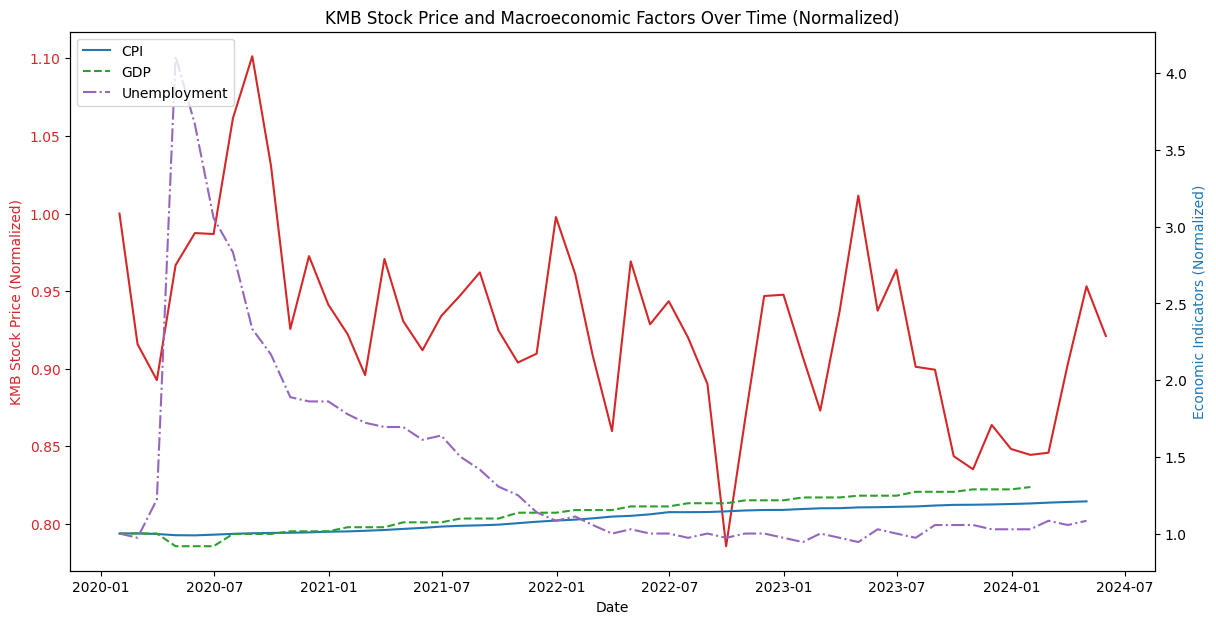

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

def fetch_and_analyze_data(ticker):
    # Define the time period
    start = '2020-01-01'
    end = '2024-05-27'

    # Fetch stock data using yfinance for the specified ticker
    stock_data = yf.download(ticker, start=start, end=end)

    # Fetch macroeconomic data
    cpi = web.DataReader('CPIAUCSL', 'fred', start, end)  # Consumer Price Index
    gdp = web.DataReader('GDP', 'fred', start, end)       # Gross Domestic Product
    unemployment = web.DataReader('UNRATE', 'fred', start, end)  # Unemployment Rate

    # Resample data to ensure consistent frequency
    cpi_monthly = cpi.resample('M').ffill()
    gdp_monthly = gdp.resample('M').ffill()
    unemployment_monthly = unemployment.resample('M').ffill()
    stock_monthly = stock_data['Close'].resample('M').last()

    # Normalize the datasets
    cpi_normalized = cpi_monthly / cpi_monthly.iloc[0]
    gdp_normalized = gdp_monthly / gdp_monthly.iloc[0]
    unemployment_normalized = unemployment_monthly / unemployment_monthly.iloc[0]
    stock_normalized = stock_monthly / stock_monthly.iloc[0]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(14, 7))
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{ticker} Stock Price (Normalized)', color=color)
    ax1.plot(stock_normalized.index, stock_normalized, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Economic Indicators (Normalized)', color=color)
    ax2.plot(cpi_normalized.index, cpi_normalized, color=color)
    ax2.plot(gdp_normalized.index, gdp_normalized, color='tab:green', linestyle='--')
    ax2.plot(unemployment_normalized.index, unemployment_normalized, color='tab:purple', linestyle='-.')
    ax2.legend(['CPI', 'GDP', 'Unemployment'], loc='upper left')

    plt.title(f'{ticker} Stock Price and Macroeconomic Factors Over Time (Normalized)')
    plt.show()

# Example usage
fetch_and_analyze_data("KMB")
